## Problem Statement
Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"
### Dataset: fraud_check.csv

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing  

In [2]:
# Loading dataset
df = pd.read_csv('Fraud_check.csv')
df 

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

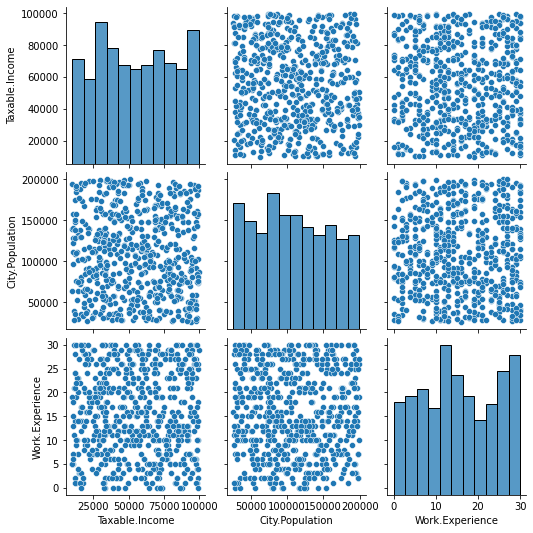

In [6]:
# pairplot
sn.pairplot(df)

In [13]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.4 MB/s eta 0:00:00


In [14]:
import category_encoders as ce

In [15]:
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['Undergrad', 'Marital.Status', 'Urban'])
df1 = encoder.fit_transform(df) 

In [16]:
# Converting the Target column i.e. Taxable Income into Categorical value
tax_val = []
for value in df["Taxable.Income"]:
 if value<=30000:
    tax_val.append("Risky")
 else:
    tax_val.append("Good")
df1["tax_val"]= tax_val

In [17]:
df1 

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_val
0,1,1,68833,50047,10,1,Good
1,2,2,33700,134075,18,1,Good
2,1,3,36925,160205,30,1,Good
3,2,1,50190,193264,15,1,Good
4,1,3,81002,27533,28,2,Good
...,...,...,...,...,...,...,...
595,2,2,76340,39492,7,1,Good
596,2,2,69967,55369,2,1,Good
597,1,2,47334,154058,0,1,Good
598,2,3,98592,180083,17,2,Good


In [18]:
x = df1.drop(['tax_val','Taxable.Income'], axis =1)
x.head() 

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,1,1,50047,10,1
1,2,2,134075,18,1
2,1,3,160205,30,1
3,2,1,193264,15,1
4,1,3,27533,28,2


In [19]:
y = df1['tax_val'] 
y 

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: tax_val, Length: 600, dtype: object

In [20]:
y.value_counts() 

Good     476
Risky    124
Name: tax_val, dtype: int64

In [21]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=40) 

## Building Decision Tree Classifier using Entropy Criteria 
### Iteration- 1: Max Depth = 2

In [22]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [23]:
#Predicting on test data
pred_test1 = model1.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test1==y_test)) 

Test data Accuracy is: 0.7777777777777778


In [24]:
#Predicting on train data
pred_train1 = model1.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train1==y_train)) 

Train data Accuracy is: 0.8


### Iteration- 2: Max Depth = 3

In [25]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model2.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [26]:
#Predicting on test data
pred_test2 = model2.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test2==y_test))

Test data Accuracy is: 0.7722222222222223


In [27]:
#Predicting on train data
pred_train2 = model2.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train2==y_train)) 

Train data Accuracy is: 0.8047619047619048


### Iteration- 3: Max Depth = 4

In [28]:
model3 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model3.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [29]:
#Predicting on test data
pred_test3 = model3.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test3==y_test)) 

Test data Accuracy is: 0.7611111111111111


In [30]:
#Predicting on train data
pred_train3 = model3.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train3==y_train)) 

Train data Accuracy is: 0.8119047619047619


### Iteration- 4: Max Depth = 5

In [31]:
model4 = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model4.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [32]:
#Predicting on test data
pred_test4 = model4.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test4==y_test)) 

Test data Accuracy is: 0.7666666666666667


In [33]:
#Predicting on train data
pred_train4 = model4.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train4==y_train)) 

Train data Accuracy is: 0.8166666666666667


### We got the best test results at Iteration- 1 max depth = 2. so we will consider that final

Text(0.5, 1.0, 'Decision tree using Entropy')

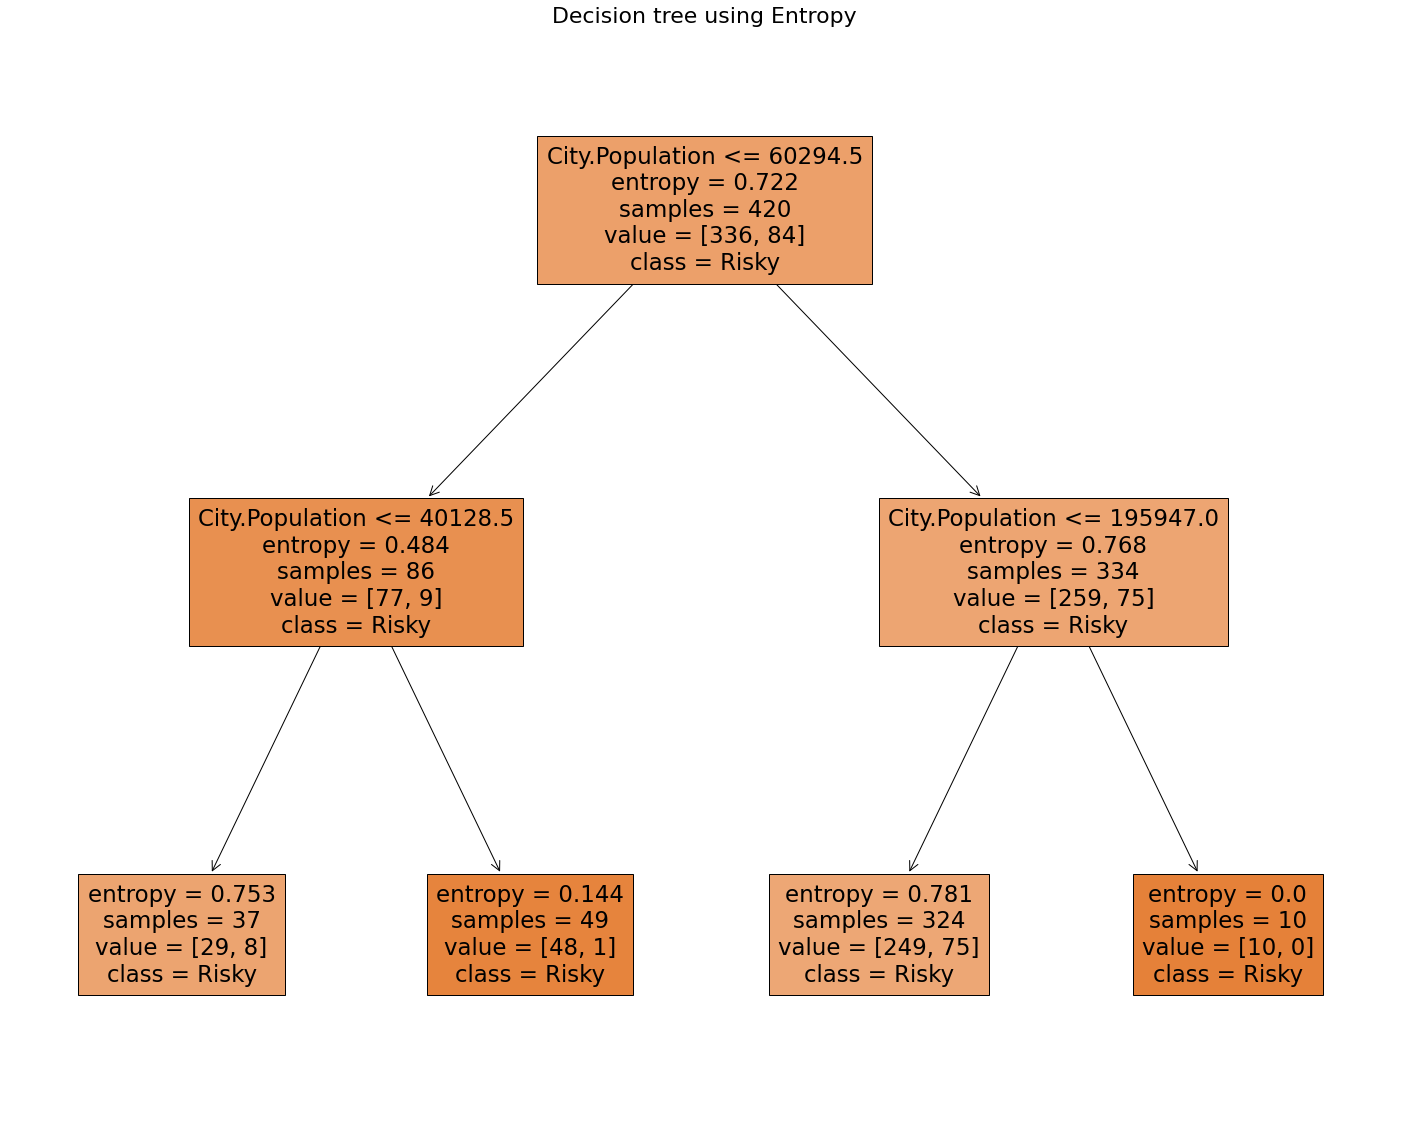

In [34]:
# let's plot the decision tree
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model1,
feature_names= ['Undergrad','Marital.Status','City.Population','Work.Experience'], class_names= ['Risky', 'Good'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)

## Building Decision Tree Classifier (CART) using Gini Criteria

### Iteration-1: Max Depth = 2

In [35]:
from sklearn.tree import DecisionTreeClassifier
model_gini1 = DecisionTreeClassifier(criterion='gini', max_depth=2)
model_gini1.fit(x_train,y_train) 

DecisionTreeClassifier(max_depth=2)

In [36]:
#Predicting on test data
pred_testg1 = model_gini1.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg1==y_test)) 

#Predicting on train data
pred_traing1 = model_gini1.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing1==y_train)) 

Test data Accuracy is: 0.7777777777777778
Train data Accuracy is: 0.8


###  Iteration-2: Max Depth = 3

In [37]:
model_gini2 = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini2.fit(x_train,y_train) 

DecisionTreeClassifier(max_depth=3)

In [38]:
#Predicting on test data
pred_testg2 = model_gini2.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg2==y_test))


#Predicting on train data
pred_traing2 = model_gini2.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing2==y_train))

Test data Accuracy is: 0.7777777777777778
Train data Accuracy is: 0.8


### Iteration-3: Max Depth = 4

In [39]:
model_gini3 = DecisionTreeClassifier(criterion='gini', max_depth=4)
model_gini3.fit(x_train,y_train) 

DecisionTreeClassifier(max_depth=4)

In [40]:
#Predicting on test data
pred_testg3 = model_gini3.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg3==y_test))


#Predicting on train data
pred_traing3 = model_gini3.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing3==y_train))

Test data Accuracy is: 0.7666666666666667
Train data Accuracy is: 0.8142857142857143


### We got the best test results at Iteration-1 max depth = 2. so we will consider that final

Text(0.5, 1.0, 'Decision tree using Gini')

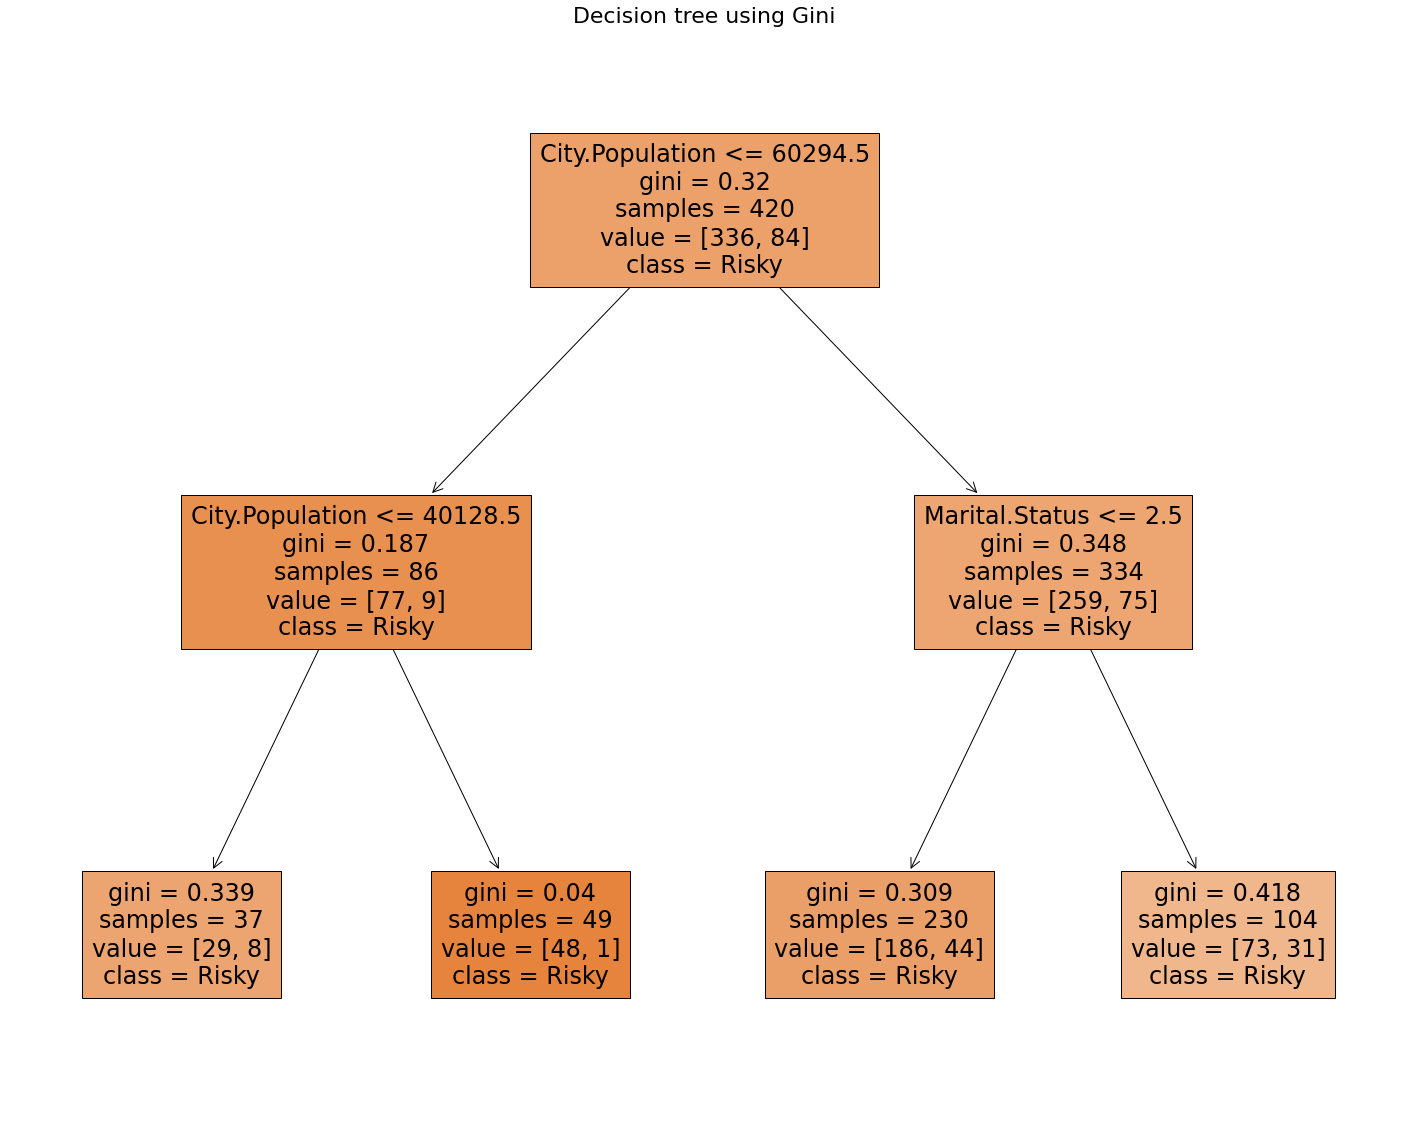

In [41]:
# let's plot the decision tree
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini1,
feature_names= ['Undergrad','Marital.Status','City.Population','Work.Experience'], class_names= ['Risky', 'Good'], filled=True)
plt.title('Decision tree using Gini',fontsize=22) 

In [42]:
model_gini1.feature_importances_  

array([0.        , 0.31306961, 0.68693039, 0.        , 0.        ])

In [43]:
preds = model1.predict(x_test)
pd.Series(preds).value_counts()  

Good    180
dtype: int64

In [44]:
preds 

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [45]:
pd.crosstab(y_test,preds) 

col_0,Good
tax_val,
Good,140
Risky,40


In [46]:
np.mean(preds==y_test)*100 

77.77777777777779

Classification Report                precision    recall  f1-score   support

        Good       0.78      1.00      0.88       140
       Risky       0.00      0.00      0.00        40

    accuracy                           0.78       180
   macro avg       0.39      0.50      0.44       180
weighted avg       0.60      0.78      0.68       180



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


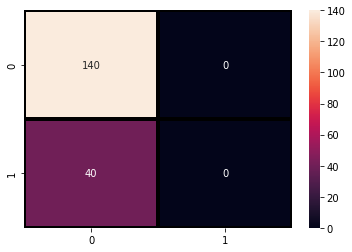

In [47]:
# Classification report
from sklearn.metrics import confusion_matrix  
sn.heatmap(confusion_matrix(y_test, preds),annot=True,fmt = "d",linecolor="k",linewidths=3)
print('Classification Report ',classification_report(y_test,preds))

## From the above decision tree the most important feature affecting the class is City Population.